In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from functools import reduce
import pingouin as pg
import plotly.express as px
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import pandas as pd

df = pd.read_json('un_speeches.json', lines=True)

df.to_csv('un_speeches.csv') 

df = pd.read_csv ('LIWC-22 Results - un_speeches - LIWC Analysis.csv')

df = df[['Analytic', 'cogproc', 'Name of Person Speaking', 'Year', 'Country', 'Clout', 'power', 'prosocial', 'emo_anger', 'conflict', 'allnone', 'family', 'friend', 'tone_pos', 'tone_neg', 'emo_anx', 'emo_sad', 'swear', 'polite', 'moral', 'reward', 'risk', 'allure']]

In [3]:
import pandas as pd
import numpy as np
from dataprep.clean import clean_country

# Load the UN speeches dataset
df = pd.read_csv('LIWC-22 Results - un_speeches - LIWC Analysis.csv')

# Selecting relevant columns
df = df[['Analytic', 'cogproc', 'Name of Person Speaking', 'Year', 'Country', 'Clout', 
         'power', 'prosocial', 'emo_anger', 'conflict', 'allnone', 'family', 'friend', 
         'tone_pos', 'tone_neg', 'emo_anx', 'emo_sad', 'swear', 'polite', 'moral', 
         'reward', 'risk', 'allure']]

# Cleaning country names
df['Country'] = df['Country'].astype(str)

# Clean the country names and add the cleaned column
df_cleaned = clean_country(df[['Country']], "Country", inplace=False, strict=True)
df['Country_clean'] = df_cleaned['Country_clean']

# Replacing 'nan' with NaN and filling missing values
df = df.replace('nan', np.NaN)
df[['Country_clean']] = df[['Country_clean']].fillna('unknown')

# Demographic statistics: Number of unique years, speeches, and countries
num_years = df['Year'].nunique()
num_speeches = df.shape[0]
num_countries = df['Country_clean'].nunique()

demographic_stats = {
    'Number of Years': num_years,
    'Number of Speeches': num_speeches,
    'Number of Countries': num_countries
}

# Select the final columns for output
df_result = df[['Country', 'Country_clean']]

print("Demographic Statistics:")
print(f"Number of Years: {num_years}")
print(f"Number of Speeches: {num_speeches}")
print(f"Number of Countries: {num_countries}")

print("\nFinal Result:")
print(df_result.head())

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	222 values cleaned (2.95%)
	657 values unable to be parsed (8.74%), set to NaN
Result contains 6826 (90.84%) values in the correct format and 688 null values (9.16%)
Demographic Statistics:
Number of Years: 46
Number of Speeches: 7514
Number of Countries: 195

Final Result:
     Country Country_clean
0    Albania       Albania
1  Argentina     Argentina
2  Australia     Australia
3    Austria       Austria
4    Belgium       Belgium


In [4]:
import pandas as pd

# Load the uploaded dataset
file_path = 'homicide-rate-unodc.csv'
df_homicide = pd.read_csv(file_path)

# Display the column names to identify the 'Country' column
print(df_homicide.columns)

Index(['Entity', 'Code', 'Year',
       'Homicide rate per 100,000 population - Both sexes - All ages'],
      dtype='object')


In [5]:
df['Country']=df['Country'].astype(str)

from dataprep.clean import clean_country
df = clean_country(df, "Country", inplace=True, strict=True)


df=df.replace('nan',np.NaN)
df[['Country_clean']] = df[['Country_clean']].fillna('unknown')


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	222 values cleaned (2.95%)
	657 values unable to be parsed (8.74%), set to NaN
Result contains 6826 (90.84%) values in the correct format and 688 null values (9.16%)


In [6]:
import pandas as pd
from dataprep.clean import clean_country

# Load the dataset
file_path = 'homicide-rate-unodc.csv'
df_homicides = pd.read_csv(file_path)

# Rename 'Entity' to 'Country' before any cleaning operations
df_homicides.rename(columns={'Entity': 'Country'}, inplace=True)

# Debug: Check if 'Homicide rate per 100,000 population - Both sexes - All ages' exists
if 'Homicide rate per 100,000 population - Both sexes - All ages' not in df_homicides.columns:
    print("Error: 'Homicide rate per 100,000 population - Both sexes - All ages' column not found.")
else:
    # Create 'Homicides' column
    df_homicides['Homicides'] = pd.to_numeric(
        df_homicides['Homicide rate per 100,000 population - Both sexes - All ages'].replace(',', '.', regex=True), 
        errors='coerce'
    )

# Debug: Check if 'Homicides' column was created successfully
print("\nColumns in 'df_homicides' after creating 'Homicides':")
print(df_homicides.columns)

if 'Homicides' not in df_homicides.columns:
    raise KeyError("Error: 'Homicides' column was not created successfully.")

# Clean the 'Country' column and ensure 'Country_clean'
df_homicides = clean_country(df_homicides, 'Country', inplace=False, strict=True)

# Debug: Check 'df_homicides' after cleaning
print("\nColumns in 'df_homicides' after cleaning:")
print(df_homicides.columns)

# Ensure 'Country_clean' and 'Year' are in the right format
df_homicides = df_homicides[df_homicides['Country_clean'].notna()]
df_homicides['Year'] = pd.to_numeric(df_homicides['Year'], errors='coerce').fillna(0).astype(int)

# Debug: Check if 'Homicides' still exists before dropping NaNs
if 'Homicides' in df_homicides.columns:
    # Drop rows with NaNs in 'Homicides' or invalid 'Year'
    df_homicides.dropna(subset=['Homicides', 'Year'], inplace=True)
    df_homicides = df_homicides[df_homicides['Year'] > 0]
else:
    print("Error: 'Homicides' column is missing before dropping NaNs.")

# Debug: Confirm 'df_homicides' is ready for merging
print("\nColumns in 'df_homicides' after preparation:")
print(df_homicides.columns)
print(df_homicides.head())


Columns in 'df_homicides' after creating 'Homicides':
Index(['Country', 'Code', 'Year',
       'Homicide rate per 100,000 population - Both sexes - All ages',
       'Homicides'],
      dtype='object')


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	87 values cleaned (2.07%)
	336 values unable to be parsed (7.99%), set to NaN
Result contains 3868 (92.01%) values in the correct format and 336 null values (7.99%)

Columns in 'df_homicides' after cleaning:
Index(['Country', 'Code', 'Year',
       'Homicide rate per 100,000 population - Both sexes - All ages',
       'Homicides', 'Country_clean'],
      dtype='object')

Columns in 'df_homicides' after preparation:
Index(['Country', 'Code', 'Year',
       'Homicide rate per 100,000 population - Both sexes - All ages',
       'Homicides', 'Country_clean'],
      dtype='object')
       Country Code  Year  \
0  Afghanistan  AFG  2009   
1  Afghanistan  AFG  2010   
2  Afghanistan  AFG  2011   
3  Afghanistan  AFG  2012   
4  Afghanistan  AFG  2015   

   Homicide rate per 100,000 population - Both sexes - All ages  Homicides  \
0                                           4.071527              4.071527   
1                                           3.487093       

In [7]:
import pandas as pd
import numpy as np
from dataprep.clean import clean_country

# Load the Globalization dataset
globalization = pd.read_csv('globalization.csv', delimiter=';', skiprows=0, low_memory=False)

# Strip spaces from column names
globalization.columns = globalization.columns.str.strip()

# Determine the country column to use
country_col = 'cname' if 'cname' in globalization.columns else 'cname_qog' if 'cname_qog' in globalization.columns else None

if country_col:
    # Select relevant columns
    globalization = globalization[['year', country_col, 'dr_ig']]

    # Rename columns for consistency
    globalization.rename(columns={country_col: 'Country', 'year': 'Year', 'dr_ig': 'Globalization'}, inplace=True)

    # Convert 'Globalization' to numeric, handling commas as decimal points
    globalization['Globalization'] = pd.to_numeric(globalization['Globalization'].astype(str).replace(',', '.', regex=True), errors='coerce')

    # Convert 'Year' to numeric
    globalization['Year'] = pd.to_numeric(globalization['Year'], errors='coerce')

    # Clean the 'Country' column using dataprep's clean_country function
    df_globalization = clean_country(globalization, "Country", fuzzy_dist=0, strict=True, inplace=True)

    # Remove rows where 'Country_clean' is NaN
    df_globalization = df_globalization[df_globalization['Country_clean'].notna()]

    # Rename 'Country_clean' to 'Country_clean' for merging consistency
    df_globalization.rename(columns={'Country_clean': 'Country_clean'}, inplace=True)

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	124 values cleaned (1.4%)
	1309 values unable to be parsed (14.73%), set to NaN
Result contains 7579 (85.27%) values in the correct format and 1309 null values (14.73%)


In [8]:
import pandas as pd
import numpy as np
from dataprep.clean import clean_country
import csv

# Load the CSV file with the correct delimiter
growth1 = pd.read_csv('growth.csv', sep=';', quoting=csv.QUOTE_NONE)

# Remove commas from numeric columns and convert them to standard float format
for col in growth1.columns[2:]:  # Skip 'Country Code' and 'Country Name'
    growth1[col] = growth1[col].replace({',': '.'}, regex=True).astype(str).replace('nan', np.nan).astype(float)

# Reshape the dataframe using pd.melt
growth1 = pd.melt(growth1, id_vars=['Country Name'], 
                  value_vars=growth1.columns[2:], 
                  var_name='Year', value_name='Growth')

# Sort the dataframe by 'Country Name'
growth1 = growth1.sort_values(by=['Country Name'])

# Rename 'Country Name' to 'Country'
growth1.rename(columns={'Country Name': 'Country'}, inplace=True)

# Convert 'Year' and 'Growth' columns to numeric (float)
growth1['Year'] = growth1['Year'].astype(float)
growth1['Growth'] = growth1['Growth'].astype(float)

# Apply country cleaning
growth1 = clean_country(growth1, "Country", inplace=True, strict=False)

# Remove rows where 'Country_clean' is NaN
growth1 = growth1[growth1['Country_clean'].notna()]

# Output the cleaned dataframe for further use

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	1166 values cleaned (8.53%)
	2332 values unable to be parsed (17.05%), set to NaN
Result contains 11342 (82.95%) values in the correct format and 2332 null values (17.05%)


In [9]:
hdi = pd.read_csv ('Human Development Index - Full.csv')

hdi = pd.melt(hdi, id_vars =['Country'], value_vars =hdi.loc[:,'Human Development Index (1990)':'Human Development Index (2021)'],
       var_name='Year', value_name='hdi')

hdi["Year"] = hdi["Year"].str.extract("(\d*\.?\d+)", expand=True)
hdi['Year']=hdi['Year'].astype(float)

hdi['hdi']=hdi['hdi'].astype(float)
hdi['Year']=hdi['Year'].astype(float)

from dataprep.clean import clean_country
hdi = clean_country(hdi, "Country", inplace=True, strict=True)

hdi=hdi.replace('nan',np.NaN)
hdi = hdi[hdi['Country_clean'].notna()]




/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	192 values cleaned (3.08%)
	320 values unable to be parsed (5.13%), set to NaN
Result contains 5920 (94.87%) values in the correct format and 320 null values (5.13%)


In [10]:
import pandas as pd
import numpy as np
from dataprep.clean import clean_country
import csv

# Read the CSV file with the correct delimiter
nat_res = pd.read_csv('nat_res.csv', delimiter=',', skiprows=0, low_memory=False)

# Strip spaces from column names
nat_res.columns = nat_res.columns.str.strip()

# Split the first column if it was incorrectly merged due to a delimiter issue
if len(nat_res.columns) == 1:
    # Split the single column into multiple columns
    nat_res = nat_res['Entity,Code,Year,Total natural resources rents (% of GDP)'].str.split(',', expand=True)
    nat_res.columns = ['Entity', 'Code', 'Year', 'Total natural resources rents (% of GDP)']

# Proceed with processing if the structure is correct
if 'Entity' in nat_res.columns and 'Year' in nat_res.columns and 'Total natural resources rents (% of GDP)' in nat_res.columns:
    # Rename columns for clarity
    nat_res.rename(columns={'Entity': 'Country', 'Total natural resources rents (% of GDP)': 'nat_res'}, inplace=True)
    
    # Convert 'Year' and 'nat_res' columns to numeric
    nat_res['Year'] = nat_res['Year'].astype(float)
    nat_res['nat_res'] = nat_res['nat_res'].astype(float)

    # Clean the 'Country' column using dataprep's clean_country function
    nat_res = clean_country(nat_res, "Country", inplace=True, strict=True)

    # Remove rows where 'Country_clean' is NaN
    nat_res = nat_res[nat_res['Country_clean'].notna()]

# The cleaned dataframe is ready for further use

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	154 values cleaned (1.55%)
	1104 values unable to be parsed (11.08%), set to NaN
Result contains 8859 (88.92%) values in the correct format and 1104 null values (11.08%)


In [11]:
import pandas as pd
import numpy as np
from dataprep.clean import clean_country

# Load the Gini dataset with the correct delimiter and column splitting
gini = pd.read_csv('gini.csv', delimiter=',', skiprows=0, low_memory=False)

# Strip spaces from column names
gini.columns = gini.columns.str.strip()

# Check if 'Country Name' is present in the dataset
if 'Country Name' in gini.columns:
    # Melt the dataframe to convert years into a 'Year' column
    gini = pd.melt(gini, id_vars=['Country Name'], 
                   value_vars=gini.columns[4:],  # Assuming columns after 'Country Name', 'Country Code', etc., are years
                   var_name='Year', value_name='gini')

    # Rename 'Country Name' to 'Country'
    gini.rename(columns={'Country Name': 'Country'}, inplace=True)

    # Convert 'Year' and 'gini' columns to numeric, coercing errors to handle non-numeric values
    gini['Year'] = pd.to_numeric(gini['Year'], errors='coerce')
    gini['gini'] = pd.to_numeric(gini['gini'], errors='coerce')

    # Clean the 'Country' column using dataprep's clean_country function
    gini = clean_country(gini, "Country", fuzzy_dist=0, strict=True, inplace=True)

    # Remove rows where 'Country_clean' is NaN
    gini = gini[gini['Country_clean'].notna()]

    # Rename 'Country_clean' to 'Country'
    gini.rename(columns={'Country_clean': 'Country'}, inplace=True)

    # Now gini DataFrame is cleaned and ready for further use

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	252 values cleaned (1.5%)
	4221 values unable to be parsed (25.19%), set to NaN
Result contains 12537 (74.81%) values in the correct format and 4221 null values (25.19%)


In [12]:
import pandas as pd
import numpy as np
from dataprep.clean import clean_country

# Load the CINC dataset
cinc = pd.read_csv('NMC-60-abridged.csv')

# Strip spaces from column names
cinc.columns = cinc.columns.str.strip()

# Check for the expected columns and proceed if they exist
if 'stateabb' in cinc.columns and 'year' in cinc.columns and 'cinc' in cinc.columns:
    # Rename 'stateabb' to 'Country' and 'year' to 'Year' for consistency
    cinc.rename(columns={'stateabb': 'Country', 'year': 'Year'}, inplace=True)

    # Keep only the relevant columns
    cow = cinc[['Year', 'Country', 'cinc']]

    # Convert the 'cinc' column to the correct data type
    cow['cinc'] = cow['cinc'].astype(float)

    # Clean the 'Country' column using dataprep's clean_country function
    cow = clean_country(cow, "Country", inplace=True, strict=True)

    # Remove rows where 'Country_clean' is NaN
    cow = cow[cow['Country_clean'].notna()]

    # Rename 'Country_clean' to 'Country'
    cow.rename(columns={'Country_clean': 'Country'}, inplace=True)

    # If cow exists and is a DataFrame, add it to the list
    data_frames = [df, growth1, nat_res, hdi, cow, gini, df_globalization, df_homicide]

/var/folders/kq/bvkxmyh97t11vs9bjbzd83mm0000gn/T/ipykernel_18264/4148201837.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow['cinc'] = cow['cinc'].astype(float)
/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	7584 values cleaned (47.55%)
	8367 values unable to be parsed (52.45%), set to NaN
Result contains 7584 (47.55%) values in the correct format and 8367 null values (52.45%)


In [13]:
data_frames = [df, growth1, nat_res, hdi, cow, gini, df_globalization, df_homicide]



In [14]:
import pandas as pd

# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

print(df)

      Analytic  cogproc            Name of Person Speaking    Year  Clout  \
0        96.14     9.60                            Mr. NAS  1970.0  52.19   
1        95.07    11.09                 Mr. DE PABLO PARDO  1970.0  48.26   
2        93.01    10.72                        Mr. McMAHON  1970.0  48.39   
3        98.03     9.52                 Mr. KIRCHSCHLAEGER  1970.0  39.92   
4        87.88    12.54                         Mr. HARMEL  1970.0  47.24   
...        ...      ...                                ...     ...    ...   
7509     94.11     7.76  Mr. Abdrabuh Mansour Hadi Mansour  2015.0  55.36   
7510     82.84    11.29               Mr. Tomislav Nikolić  2015.0  53.03   
7511     98.89     7.11                         Jacob Zuma  2015.0  60.92   
7512     96.12     7.28             Mr. Edgar Chagwa Lungu  2015.0  65.75   
7513     92.91     8.54                      Robert Mugabe  2015.0  61.65   

      power  prosocial  emo_anger  conflict  allnone  ...  tone_neg  emo_an

In [15]:
from dataprep.clean import clean_country
from functools import reduce

# Prepare 'gini' and other DataFrames to have 'Country_clean'
data_frames = [df, growth1, nat_res, hdi, cow, gini, df_globalization, df_homicides]

# Function to ensure 'Country_clean' is present
def prepare_dataframe(df_item, index):
    # Rename 'Country' to 'Country_clean' if not already cleaned
    if 'Country' in df_item.columns and 'Country_clean' not in df_item.columns:
        df_item = clean_country(df_item, 'Country', inplace=False, strict=True)
    
    # Check if 'Year' is present, if not, raise a warning
    if 'Year' not in df_item.columns:
        print(f"\nWarning: DataFrame at index {index} is missing 'Year'.")
        return None
    
    # Remove duplicate columns
    df_item = df_item.loc[:, ~df_item.columns.duplicated()]
    
    return df_item

# Apply the preparation function to each dataframe
for i in range(len(data_frames)):
    data_frames[i] = prepare_dataframe(data_frames[i], i)

# Filter out None entries (DataFrames that couldn't be prepared correctly)
data_frames = [df for df in data_frames if df is not None]

# Merge the DataFrames on 'Country_clean' and 'Year'
try:
    df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Country_clean', 'Year'], how='left'), data_frames)
except Exception as e:
    print(f"\nError during merging: {e}")
    df_merged = None

# Step 3: Debug Final Merged DataFrame
if df_merged is not None:
    print("\nColumns in the final merged DataFrame:")
    print(df_merged.columns)

    # Check if 'Homicides' column is present in the final merged DataFrame
    if 'Homicides' in df_merged.columns:
        print("\n'Homicides' column is present in the final merged DataFrame.")
    else:
        print("\nError: 'Homicides' column is missing in the final merged DataFrame.")
else:
    print("\nError: Merging failed.")

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
Result contains 7584 (100.0%) values in the correct format and 0 null values (0.0%)


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
Result contains 12537 (100.0%) values in the correct format and 0 null values (0.0%)

Columns in the final merged DataFrame:
Index(['Analytic', 'cogproc', 'Name of Person Speaking', 'Year', 'Clout',
       'power', 'prosocial', 'emo_anger', 'conflict', 'allnone', 'family',
       'friend', 'tone_pos', 'tone_neg', 'emo_anx', 'emo_sad', 'swear',
       'polite', 'moral', 'reward', 'risk', 'allure', 'Country_clean',
       'Growth', 'Code_x', 'nat_res', 'hdi', 'cinc', 'Country_x', 'gini',
       'Country_y', 'Globalization', 'Country', 'Code_y',
       'Homicide rate per 100,000 population - Both sexes - All ages',
       'Homicides'],
      dtype='object')

'Homicides' column is present in the final merged DataFrame.


In [16]:
from dataprep.clean import clean_country
import numpy as np

# Add 'Country_clean' to cow
cow = clean_country(cow, "Country", inplace=False, strict=False)
if 'Country_clean' not in cow.columns:
    cow['Country_clean'] = cow['Country']  # Fallback in case clean_country fails

# Add 'Country_clean' to df_fatalities
df_fatalities = clean_country(df_homicide, "Entity", inplace=False, strict=False)
if 'Country_clean' not in df_homicide.columns:
    df_fatalities['Country_clean'] = df_homicide['Entity']  # Fallback in case clean_country fails

# Verify the changes
print("Updated 'cow':")
print(cow.head())
print("\nUpdated 'df_homicide':")
print(df_fatalities.head())

# Inspect df_globalization to understand why it is empty
print("\nInspecting df_globalization:")
print(df_globalization)

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


Country Cleaning Report:
Result contains 7584 (100.0%) values in the correct format and 0 null values (0.0%)


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	247 values cleaned (5.88%)
	176 values unable to be parsed (4.19%), set to NaN
Result contains 4028 (95.81%) values in the correct format and 176 null values (4.19%)
Updated 'cow':
   Year      cinc        Country  Country_clean
0  1816  0.039697  United States  United States
1  1817  0.035817  United States  United States
2  1818  0.036127  United States  United States
3  1819  0.037133  United States  United States
4  1820  0.037087  United States  United States

Updated 'df_homicide':
        Entity Code  Year  \
0  Afghanistan  AFG  2009   
1  Afghanistan  AFG  2010   
2  Afghanistan  AFG  2011   
3  Afghanistan  AFG  2012   
4  Afghanistan  AFG  2015   

   Homicide rate per 100,000 population - Both sexes - All ages Entity_clean  \
0                                           4.071527             Afghanistan   
1                                           3.487093             Afghanistan   
2                                           4.208668             A

In [17]:
import pandas as pd
from functools import reduce

# List of DataFrames to merge
data_frames = [df, growth1, nat_res, hdi, cow, gini, df_globalization, df_homicide]

# Check and ensure all elements are DataFrames, ignoring elements that are not
valid_data_frames = []
for i, df_item in enumerate(data_frames):
    if isinstance(df_item, pd.DataFrame):
        # Check if 'Country_clean' and 'Year' need to be renamed to 'Country_clean' and 'Year'
        if 'country_clean' in df_item.columns:
            df_item = df_item.rename(columns={'country_clean': 'Country_clean'})
        if 'year' in df_item.columns:
            df_item = df_item.rename(columns={'year': 'Year'})

        # Check if the DataFrame contains the required columns after renaming
        if 'Country_clean' in df_item.columns and 'Year' in df_item.columns:
            # Remove duplicate columns in each DataFrame
            df_item = df_item.loc[:, ~df_item.columns.duplicated()]
            valid_data_frames.append(df_item)
        else:
            print(f"DataFrame at index {i} is missing 'Country_clean' or 'Year' column after renaming.")
    else:
        print(f"Element at index {i} is not a DataFrame and will be skipped: {df_item}")

# Perform the merge on 'Country_clean' and 'Year' if valid DataFrames are present
if valid_data_frames:
    df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Country_clean', 'Year'], how='left'), valid_data_frames)
    # Output the merged DataFrame
    print(df_merged)
else:
    print("No valid DataFrames found to merge.")

DataFrame at index 5 is missing 'Country_clean' or 'Year' column after renaming.
DataFrame at index 7 is missing 'Country_clean' or 'Year' column after renaming.
      Analytic  cogproc            Name of Person Speaking    Year  Clout  \
0        96.14     9.60                            Mr. NAS  1970.0  52.19   
1        95.07    11.09                 Mr. DE PABLO PARDO  1970.0  48.26   
2        93.01    10.72                        Mr. McMAHON  1970.0  48.39   
3        98.03     9.52                 Mr. KIRCHSCHLAEGER  1970.0  39.92   
4        87.88    12.54                         Mr. HARMEL  1970.0  47.24   
...        ...      ...                                ...     ...    ...   
7638     94.11     7.76  Mr. Abdrabuh Mansour Hadi Mansour  2015.0  55.36   
7639     82.84    11.29               Mr. Tomislav Nikolić  2015.0  53.03   
7640     98.89     7.11                         Jacob Zuma  2015.0  60.92   
7641     96.12     7.28             Mr. Edgar Chagwa Lungu  2015.0  

In [18]:
import pandas as pd
from functools import reduce
from dataprep.clean import clean_country

# Define possible column names for the country information
possible_country_columns = ['Country', 'Entity', 'ccode']

# Make sure all DataFrames have 'Country_clean' column
for i in range(len(data_frames)):
    # Check for possible country columns and rename them to 'Country' if found
    found_column = False
    for col in possible_country_columns:
        if col in data_frames[i].columns:
            data_frames[i].rename(columns={col: 'Country'}, inplace=True)
            found_column = True
            break

    # If 'Country_clean' column is still missing, use dataprep to clean 'Country'
    if 'Country_clean' not in data_frames[i].columns:
        if 'Country' in data_frames[i].columns:
            # Use dataprep to clean the 'Country' column and create 'Country_clean'
            data_frames[i] = clean_country(data_frames[i], 'Country', inplace=False, strict=True)
            # If 'Country_clean' wasn't added correctly, ensure it is properly renamed
            if 'Country_clean' not in data_frames[i].columns:
                data_frames[i].rename(columns={'Country_clean': 'Country_clean'}, inplace=True)
        else:
            # If neither 'Country_clean' nor 'Country' exists, continue to next DataFrame
            print(f"Unable to clean DataFrame at index {i} due to missing country column.")
            continue

    # Remove duplicate columns from each DataFrame
    data_frames[i] = data_frames[i].loc[:, ~data_frames[i].columns.duplicated()]

# Remove DataFrames that were skipped due to missing country columns
data_frames = [df for df in data_frames if 'Country_clean' in df.columns]

# Perform the merge on 'Country_clean' and 'Year'
df = reduce(lambda left, right: pd.merge(left, right, on=['Country_clean', 'Year'], how='left'), data_frames)

# The merged DataFrame is now assigned to 'df' and can be further processed.

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                     | 0/8 [00:00<?, ?it/s]

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


Country Cleaning Report:
Result contains 12537 (100.0%) values in the correct format and 0 null values (0.0%)


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	87 values cleaned (2.07%)
	336 values unable to be parsed (7.99%), set to NaN
Result contains 3868 (92.01%) values in the correct format and 336 null values (7.99%)


In [19]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['Country_clean', 'Year'],
                                           how='left'), data_frames)

In [20]:
# Delete rows containing either 75% or more than 75% NaN Values
perc = 50.0 # Here N is 75
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df = df.dropna( axis=0, 
                    thresh=min_count)

In [21]:
df_agreement = pd.read_csv('agreement_scores.csv')

df_codes = pd.read_csv('COW-country-codes.csv')

# Create a mapping from COWn to Country name
df_codes["CCode"] = df_codes["CCode"].astype(int)
code_to_name = dict(zip(df_codes["CCode"], df_codes["StateNme"]))

# Map the numerical codes to country names
df_agreement["ccode1"] = df_agreement["ccode1"].astype(int)
df_agreement["ccode2"] = df_agreement["ccode2"].astype(int)
df_agreement["ccode1"] = df_agreement["ccode1"].map(code_to_name)
df_agreement["ccode2"] = df_agreement["ccode2"].map(code_to_name)

from dataprep.clean import clean_country
df_agreement = clean_country(df_agreement, "ccode1", inplace=True, strict=True)

from dataprep.clean import clean_country
df_agreement = clean_country(df_agreement, "ccode2", inplace=True, strict=True)

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                    | 0/22 [00:00<?, ?it/s]

Country Cleaning Report:
	27363 values cleaned (1.52%)
	92639 values unable to be parsed (5.15%), set to NaN
Result contains 1707655 (94.85%) values in the correct format and 92639 null values (5.15%)


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/dask/dataframe/core.py:7365: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|                                                    | 0/22 [00:00<?, ?it/s]

Country Cleaning Report:
	27363 values cleaned (1.52%)
	92639 values unable to be parsed (5.15%), set to NaN
Result contains 1707655 (94.85%) values in the correct format and 92639 null values (5.15%)


In [22]:
import pandas as pd
import networkx as nx
from tqdm import tqdm

# Rename the 'year' column to 'Year'
df_agreement = df_agreement.rename(columns={'year': 'Year'})

# Drop rows with NaN values in the country columns
df_agreement = df_agreement.dropna(subset=['ccode1_clean', 'ccode2_clean'])

# Group the data by year
grouped_df = df_agreement.groupby('Year')

# Create an empty list to store the yearly agreeableness DataFrames
yearly_agreeableness_list = []

# Initialize the progress bar with the total number of rows in the dataframe
total_rows = len(df_agreement)
with tqdm(total=total_rows, desc="Calculating Yearly Agreement Scores") as pbar:
    for year, group in grouped_df:
        # Create an empty directed weighted graph for each year
        G = nx.DiGraph()

        # Iterate over the rows of the group to add edges with weights
        for _, row in group.iterrows():
            ccode1 = row['ccode1_clean']
            ccode2 = row['ccode2_clean']
            agreeableness = row['agree']

            if G.has_edge(ccode1, ccode2):
                # Edge already exists, update the weight
                G[ccode1][ccode2]['weight'] += agreeableness
            else:
                # Edge doesn't exist, add it with the initial weight
                G.add_edge(ccode1, ccode2, weight=agreeableness)

            # Update the progress bar for each processed row
            pbar.update(1)
        
        # Calculate the weighted agreeableness scores for each country in the graph
        weighted_agreeableness = {}
        for country in G.nodes():
            neighbor_weights = [G[country][neighbor]['weight'] for neighbor in G.neighbors(country)]
            weighted_agreeableness[country] = sum(neighbor_weights) / len(neighbor_weights) if neighbor_weights else 0
        
        # Create a DataFrame for the yearly scores and add it to the list
        year_scores = pd.DataFrame({'Year': [year] * len(weighted_agreeableness),
                                    'Country': list(weighted_agreeableness.keys()),
                                    'Agreement': list(weighted_agreeableness.values())})
        yearly_agreeableness_list.append(year_scores)

# Concatenate all yearly DataFrames into a single DataFrame
yearly_agreeableness = pd.concat(yearly_agreeableness_list, ignore_index=True)

# Convert the 'Year' column to integer
yearly_agreeableness['Year'] = yearly_agreeableness['Year'].astype(int)

# Sort the DataFrame by year and country
yearly_agreeableness = yearly_agreeableness.sort_values(by=['Year', 'Country']).reset_index(drop=True)

Calculating Yearly Agreement Scores: 100%|█| 1619464/1619464 [00:26<00:00, 61606


In [23]:
# Print the final DataFrame
yearly_agreeableness = yearly_agreeableness.rename(columns={'Country': 'Country_clean'})

df = pd.merge(df, yearly_agreeableness,on=['Country_clean', 'Year'], how='left')
df['Agreement'] = df['Agreement'].astype(float)


In [24]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

# Separate the 'Year' column from the rest of the numeric data
year_column = df['Year']
df1 = df._get_numeric_data().drop(columns=['Year'])

# Perform iterative imputation using IterativeImputer
imputer = IterativeImputer(random_state=0)
imputed = imputer.fit_transform(df1)
df_imputed = pd.DataFrame(imputed, columns=df1.columns)

# Re-attach the 'Year' column without imputing it
df_imputed['Year'] = year_column

# Calculate the mean absolute error between the imputed and original datasets
mae = np.mean(np.abs(df_imputed.loc[:, df1.columns] - df.loc[:, df1.columns]))

# Perform complete case analysis by dropping rows with missing values
df_complete = df.dropna()

# Calculate the mean absolute error between the complete cases dataset and the original dataset
mae_complete = np.mean(np.abs(df_complete.loc[:, df1.columns] - df.loc[:, df1.columns]))

# Drop NaN values from df1 and df_imputed before calculating the root mean squared error
df1_dropna = df1.dropna()
df_imputed_dropna = df_imputed.loc[df1_dropna.index, df1.columns]

# Calculate the root mean squared error between the imputed and original datasets
rmse = np.sqrt(mean_squared_error(df_imputed_dropna, df1_dropna))

# Perform hypothesis tests comparing the imputed and original datasets
p_values = []
for column in df1.columns:
    _, p_value = ttest_ind(df_imputed_dropna[column], df1_dropna[column])
    p_values.append(p_value)

# Add the non-numeric columns back to the df_imputed DataFrame
non_numeric_cols = set(df.columns) - set(df1.columns)
for col in non_numeric_cols:
    df_imputed[col] = df[col]

# Print or display the results of the sensitivity analyses
print("Sensitivity Analysis Results:")
print(f"Mean Absolute Error (Iterative Imputation): {mae}")
print(f"Root Mean Squared Error (Iterative Imputation): {rmse}")
print("Hypothesis Test P-values (Iterative Imputation):")
for column, p_value in zip(df1.columns, p_values):
    print(f"{column}: {p_value}")
print("Complete Case Analysis Sample Size (Iterative Imputation):", len(df_complete))
print(f"Mean Absolute Error (Complete Cases): {mae_complete}")
print(f"Root Mean Squared Error (Complete Cases): {rmse}")

Sensitivity Analysis Results:
Mean Absolute Error (Iterative Imputation): 0.0
Root Mean Squared Error (Iterative Imputation): 0.0
Hypothesis Test P-values (Iterative Imputation):
Analytic: 1.0
cogproc: 1.0
Clout: 1.0
power: 1.0
prosocial: 1.0
emo_anger: 1.0
conflict: 1.0
allnone: 1.0
family: 1.0
friend: 1.0
tone_pos: 1.0
tone_neg: 1.0
emo_anx: 1.0
emo_sad: 1.0
swear: 1.0
polite: 1.0
moral: 1.0
reward: 1.0
risk: 1.0
allure: 1.0
Growth: 1.0
nat_res: 1.0
hdi: 1.0
cinc: 1.0
gini: 1.0
Globalization: 1.0
Homicide rate per 100,000 population - Both sexes - All ages: 1.0
Agreement: 1.0
Complete Case Analysis Sample Size (Iterative Imputation): 388
Mean Absolute Error (Complete Cases): 0.0
Root Mean Squared Error (Complete Cases): 0.0


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
df = df_imputed

In [26]:
df_liwc = df

# Define the path where you want to save the CSV file
file_path = "/Users/aligiritlioglu/Desktop/code/df_liwc"

# Save the DataFrame as a CSV file
df_liwc.to_csv(file_path, index=False)

In [27]:
unique_names = df_liwc['Name of Person Speaking'].unique()
print(unique_names)

['Mr. NAS' 'Mr. DE PABLO PARDO' 'Mr. McMAHON' ...
 'Mr. Abdrabuh Mansour Hadi Mansour' 'Mr. Tomislav Nikolić'
 'Mr. Edgar Chagwa Lungu']


In [28]:
import wikipediaapi
import re
import pandas as pd
import asyncio
import aiohttp
from tqdm.asyncio import tqdm
import nest_asyncio
import logging
import gender_guesser.detector as gender

# Apply the nested asyncio patch
nest_asyncio.apply()

# Set up logging to suppress the Wikipedia API logs
logging.getLogger('wikipediaapi').setLevel(logging.ERROR)

# Initialize the Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='YourAppName/1.0 (your-email@example.com) (Wikipedia-API/0.6.0; https://github.com/martin-majlis/Wikipedia-API/)',
    extract_format=wikipediaapi.ExtractFormat.WIKI
)

# Initialize the gender detector
d = gender.Detector()

# Function to clean and standardize names and infer gender
def standardize_name_and_infer_gender(name):
    inferred_gender = None
    if isinstance(name, str):
        # Infer gender based on titles
        if re.match(r'^Mr\.', name, re.IGNORECASE):
            inferred_gender = 'male'
        elif re.match(r'^Mrs\.|Ms\.|Miss|Lady', name, re.IGNORECASE):
            inferred_gender = 'female'
        elif re.match(r'^Lord|Sheikh', name, re.IGNORECASE):
            inferred_gender = 'male'
        # Remove titles, but keep Dr. and Prof. as they can be both sexes
        name = re.sub(r'^(Mr\.|Mrs\.|Ms\.|Miss|Lord|Lady|Sheikh)\s+', '', name, flags=re.IGNORECASE)
        name = name.title()  # Convert to title case
    return name, inferred_gender

# Display the total number of individuals in the original dataset
total_individuals = df_liwc['Name of Person Speaking'].nunique()
print(f"Total number of individuals in the original dataset: {total_individuals}")

# Apply the function to standardize names and infer gender
df_liwc['Standardized_Name'] = df_liwc['Name of Person Speaking'].apply(lambda x: standardize_name_and_infer_gender(x)[0])
df_liwc['Inferred_Gender'] = df_liwc['Name of Person Speaking'].apply(lambda x: standardize_name_and_infer_gender(x)[1])
unique_names = [name for name in df_liwc['Standardized_Name'].unique() if isinstance(name, str)]

async def fetch(session, url, headers, params, retries=5, backoff_factor=0.5):
    timeout = aiohttp.ClientTimeout(total=60)  # Increase the timeout to 60 seconds
    for i in range(retries):
        try:
            async with session.get(url, headers=headers, params=params, timeout=timeout) as response:
                response.raise_for_status()
                return await response.json()
        except aiohttp.ClientResponseError as e:
            if e.status in [429, 500, 502, 503, 504]:
                backoff = backoff_factor * (2 ** i)
                await asyncio.sleep(backoff)
            else:
                return None
        except aiohttp.ClientError:
            return None
        except asyncio.TimeoutError:
            print(f"Timeout error for URL: {url}")
        except Exception:
            return None
    return None

async def get_info_from_wikipedia(names):
    data_list = []
    async with aiohttp.ClientSession() as session:
        tasks = []
        for name in names:
            query = name.replace(" ", "_")
            url = f"https://en.wikipedia.org/w/api.php?action=query&prop=extracts|pageprops&titles={query}&explaintext=1&exsectionformat=wiki&format=json"
            headers = {
                "User-Agent": "YourAppName/1.0 (your-email@example.com)"
            }
            tasks.append(fetch(session, url, headers, {}))

        responses = []
        for f in tqdm(asyncio.as_completed(tasks), total=len(tasks), desc="Querying Wikipedia"):
            responses.append(await f)

        for response in responses:
            if response is None:
                continue
            pages = response.get('query', {}).get('pages', {})
            for page_id, page_data in pages.items():
                if page_id == "-1":
                    continue
                extract = page_data.get('extract', "")
                birth_date = None
                inferred_gender = None

                # Extract birth date using multiple patterns
                birth_date_patterns = [
                    r'born\s+(\d{1,2}\s+\w+\s+\d{4})',
                    r'\b(\d{1,2}\s+\w+\s+\d{4})\b',
                    r'\b(\d{4})\b',
                    r'birth\s+date\s*[:;]?\s*(\d{1,2}\s+\w+\s+\d{4})',
                    r'birthday\s*[:;]?\s*(\d{1,2}\s+\w+\s+\d{4})',
                ]
                for pattern in birth_date_patterns:
                    match = re.search(pattern, extract, re.IGNORECASE)
                    if match:
                        birth_date = pd.to_datetime(match.group(1), errors='coerce')
                        if pd.notnull(birth_date):
                            break

                # Infer gender from text
                if re.search(r'\bhe\b', extract, re.IGNORECASE):
                    inferred_gender = 'male'
                elif re.search(r'\bshe\b', extract, re.IGNORECASE):
                    inferred_gender = 'female'

                person_name = page_data.get('title', None)
                data_list.append((person_name, birth_date, inferred_gender))

    columns = ['Name', 'BirthDate', 'Sex']
    return pd.DataFrame(data_list, columns=columns)

# Run the async function within the current event loop
print("Fetching information from Wikipedia...")
df_wikipedia_info = asyncio.run(get_info_from_wikipedia(unique_names))
print("Finished fetching information from Wikipedia.")
print("Wikipedia Data:")
print(df_wikipedia_info.head())

# Merge the additional information with the original dataset
df_merged = pd.merge(df_liwc, df_wikipedia_info, left_on='Standardized_Name', right_on='Name', how='left')

# Ensure 'Sex' column exists before combining
if 'Sex' not in df_merged.columns:
    df_merged['Sex'] = None

# Update the 'Sex' column with inferred gender where Wikipedia query didn't provide it
df_merged['Sex'] = df_merged['Sex'].combine_first(df_merged['Inferred_Gender'])

# Use the gender detection algorithm to fill in remaining unknown genders
def detect_gender(name):
    if isinstance(name, str):
        first_name = name.split()[0] if ' ' in name else name  # Handle single word names as last names
        guess = d.get_gender(first_name)
        if guess in ['male', 'female']:
            return guess
    return None

df_merged['Sex'] = df_merged.apply(lambda row: row['Sex'] if pd.notnull(row['Sex']) else detect_gender(row['Standardized_Name']), axis=1)

# Calculate the age if the birth date is available
df_merged['BirthDate'] = pd.to_datetime(df_merged['BirthDate'], errors='coerce')
df_merged['Age'] = df_merged.apply(lambda row: row['Year'] - row['BirthDate'].year if pd.notnull(row['BirthDate']) else None, axis=1)

# Label ages below 18 and above 120 as NaN
df_merged['Age'] = df_merged['Age'].apply(lambda x: x if 18 <= x <= 120 else None)

# Remove duplicate columns and rename as necessary
df_merged = df_merged.drop(columns=['Name'])
df_merged = df_merged.rename(columns={'Standardized_Name': 'Name'})

# Remove any additional duplicates
df_merged = df_merged.drop_duplicates(subset=['Name', 'Sex', 'Age'])

# Display the updated dataset
print("Merged Data:")
print(df_merged.head())

# Descriptive statistics for ages
print("Descriptive Statistics for Ages:")
print(df_merged['Age'].describe())

# Count of each sex
print("Count of Each Sex:")
print(df_merged['Sex'].value_counts())

# Print the number of individuals with gender and age
print(f"Number of unique individuals: {df_merged['Name'].nunique()}")
print(f"Number of unique individuals with gender: {df_merged.dropna(subset=['Sex'])['Name'].nunique()}")
print(f"Number of unique individuals with age: {df_merged.dropna(subset=['Age'])['Name'].nunique()}")

# Save the updated dataset to a CSV file
df_merged.to_csv('Gender.csv', index=False)

print("Data has been saved to Gender.csv")


Total number of individuals in the original dataset: 5188
Fetching information from Wikipedia...


Querying Wikipedia: 100%|██████████████████| 4064/4064 [00:22<00:00, 179.12it/s]


Finished fetching information from Wikipedia.
Wikipedia Data:
                       Name  BirthDate     Sex
0  Lila Ratsifandrihamanana 1959-01-01  female
1                  Boutaleb 1923-01-01    None
2                     Stray 1991-01-01    None
3                Fahnbulleh 1912-01-01    None
4         Thorbjorn Jagland        NaT    None
Merged Data:
   Analytic  cogproc  Clout  power  prosocial  emo_anger  conflict  allnone  \
0     96.14     9.60  52.19   6.60       0.81       0.87      1.47     1.22   
1     95.07    11.09  48.26   2.80       1.03       0.06      0.33     0.67   
2     93.01    10.72  48.39   3.06       1.25       0.17      0.56     0.67   
3     98.03     9.52  39.92   3.93       1.18       0.02      0.76     0.76   
4     87.88    12.54  47.24   2.61       0.86       0.00      0.28     0.89   

   family  friend  ...  Code_y  Name of Person Speaking  Country_y  Country_x  \
0    0.11    0.18  ...     NaN                  Mr. NAS    Albania    Albania   
1    0

In [29]:
df = df_merged

In [30]:
# Calculate the number of individuals with sex information
num_sexed_individuals = df_merged.dropna(subset=['Sex'])['Name'].nunique()

# Calculate the number of individuals with age information
num_aged_individuals = df_merged.dropna(subset=['Age'])['Name'].nunique()

# Calculate the number of individuals with both sex and age information
num_sexed_and_aged_individuals = df_merged.dropna(subset=['Sex', 'Age'])['Name'].nunique()

print(f"Number of individuals with sex information: {num_sexed_individuals}")
print(f"Number of individuals with age information: {num_aged_individuals}")
print(f"Number of individuals with both sex and age information: {num_sexed_and_aged_individuals}")

Number of individuals with sex information: 2974
Number of individuals with age information: 564
Number of individuals with both sex and age information: 532


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [32]:
df_num = df._get_numeric_data()

x = df_num[['Clout', 'power', 'prosocial', 'emo_anger', 'conflict', 'allnone', 'family', 'friend', 'tone_pos', 'tone_neg', 'emo_anx', 'emo_sad', 'swear', 'polite', 'moral', 'reward', 'risk', 'allure']]

x = x.loc[:,~(df==0).all(axis=0)]

x.dropna(inplace=True)

In [33]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(x)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model)

21384.4989299805 0.0
0.7305792985684876


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [34]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(10, rotation=None)
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

#GET EIGENVALUES
ev, v = fa.get_eigenvalues()

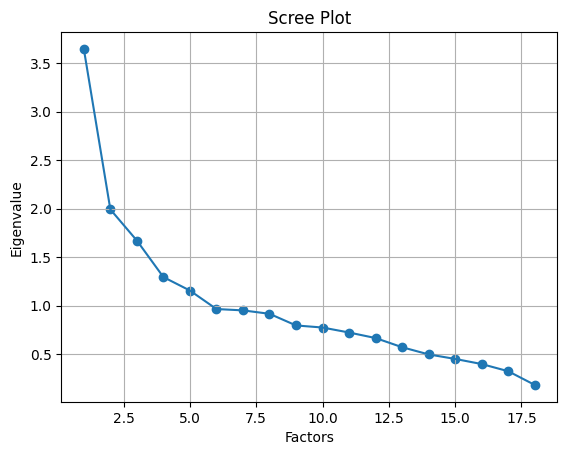

In [35]:
# SCREEPLOT (need pyplot)
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [36]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [37]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=x.columns)

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(loadings)

           Factor 1  Factor 2
Clout     -0.058564  0.524946
power      0.510964 -0.132715
prosocial -0.182793  0.690598
emo_anger  0.561639 -0.266492
conflict   0.780225 -0.024755
allnone    0.288625 -0.072638
family     0.164436  0.182096
friend     0.155317  0.020663
tone_pos  -0.241412  0.760298
tone_neg   0.954240 -0.014005
emo_anx    0.295111 -0.064156
emo_sad    0.230472 -0.067465
swear      0.093761 -0.017969
polite    -0.247084  0.390643
moral      0.149813  0.165907
reward    -0.261323  0.446109
risk       0.109922  0.213192
allure     0.148536  0.061796


In [39]:
df['Year']=df['Year'].astype(float)
df['Country_clean']=df['Country_clean'].astype(str)

df['Country_clean']=df.Country_clean.astype('str')

df["Year_order"]=df["Year"]-df["Year"].min()


prestige = (df['Clout'] + df['prosocial']+df['tone_pos'] + df['polite'] + df['reward'])

dominance = (df['tone_neg']+ df['conflict'] + df['emo_anger'] + df['emo_anx'] + df['power'] + df['allnone'] )

df["prestige"]=prestige
df["dominance"]=dominance

In [40]:
import numpy as np
import pandas as pd

# Example DataFrame setup
# df = pd.read_csv('your_data.csv')  # Load your data

# Normalize dominance and prestige scores separately to a [0, 1] range
df['normalized_dominance'] = (df['dominance'] - df['dominance'].min()) / (df['dominance'].max() - df['dominance'].min())
df['normalized_prestige'] = (df['prestige'] - df['prestige'].min()) / (df['prestige'].max() - df['prestige'].min())

# Calculate relative score for prestige
df['relative_prestige'] = df['normalized_prestige'] / (df['normalized_prestige'] + df['normalized_dominance'])

# Center the relative_prestige values around zero
centered_prestige = df['relative_prestige'] - df['relative_prestige'].mean()

# Apply sigmoid transformation to spread out the values
k = 10  # Adjust this value to control the steepness of the sigmoid curve
df['status_tendencies'] = 1 / (1 + np.exp(-k * centered_prestige))

# Calculate country-level tendencies year by year
country_tendencies_yearly = df.groupby(['Country_clean', 'Year'])['status_tendencies'].mean().reset_index()

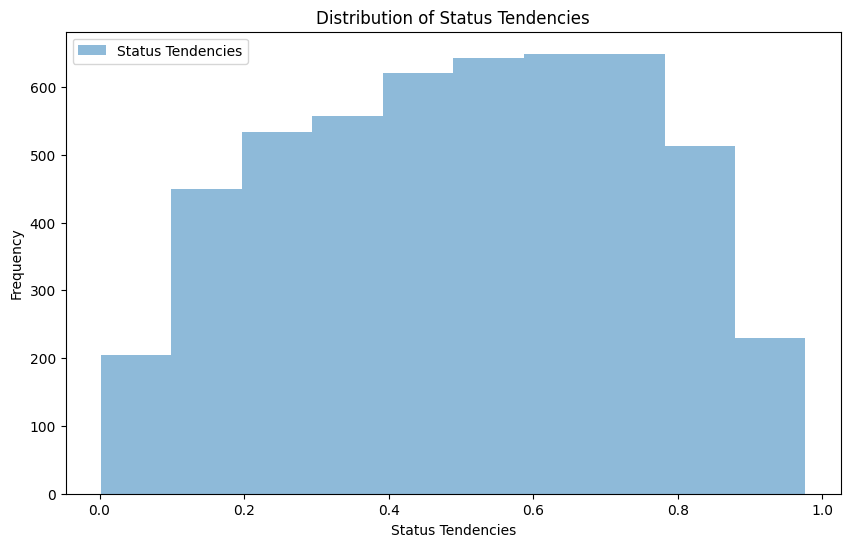

In [41]:
# Plot the distribution of individual and combined status tendencies
plt.figure(figsize=(10, 6))
plt.hist(df['status_tendencies'], bins=10, alpha=0.5, label='Status Tendencies')
plt.xlabel('Status Tendencies')
plt.ylabel('Frequency')
plt.title('Distribution of Status Tendencies')
plt.legend()
plt.show()



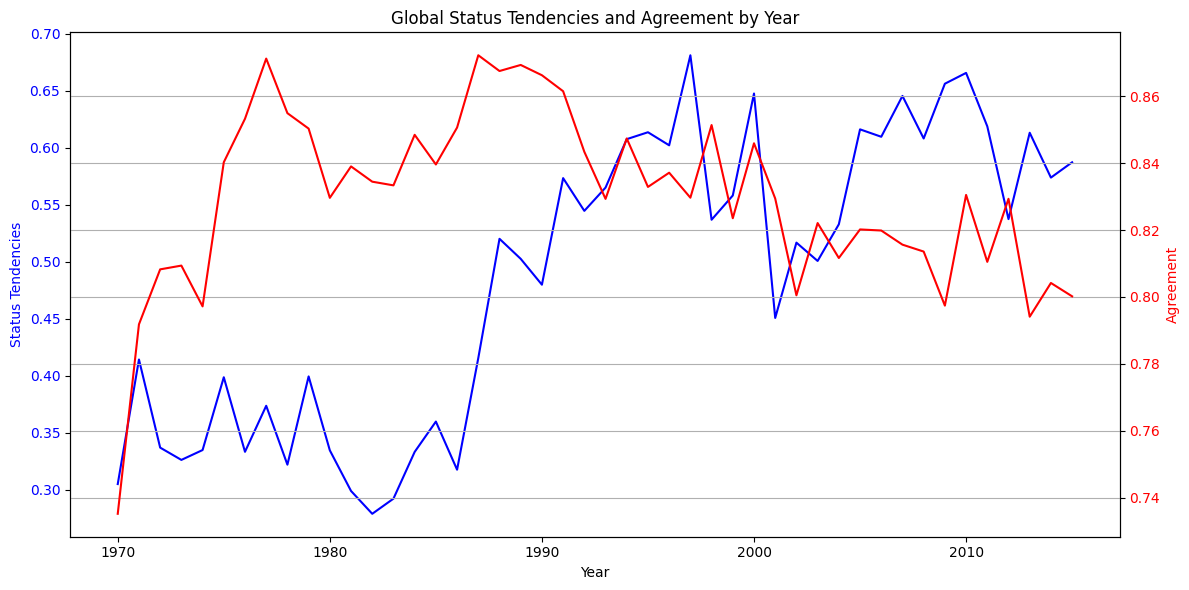

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the necessary columns

# Aggregate status_tendencies and Agreement by year
yearly_data = df.groupby('Year')[['status_tendencies', 'Agreement']].mean().reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot status_tendencies on the first y-axis
ax1.plot(yearly_data['Year'], yearly_data['status_tendencies'], color='b', label='Status Tendencies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Status Tendencies', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Agreement'], color='r', label='Agreement')
ax2.set_ylabel('Agreement', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Global Status Tendencies and Agreement by Year')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Jan, 2025
Time:                     12:36:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.89681
Nobs:                     5030.00    HQIC:                  -2.97516
Log likelihood:          -13730.0    FPE:                  0.0489273
AIC:                     -3.01742    Det(Omega_mle):       0.0480337
--------------------------------------------------------------------
Results for equation status_tendencies
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.282575         0.097085           -2.911           0.004
L1.status_tendencies          0.096921         0.014120            6.864           0.000
L1.Agreement    

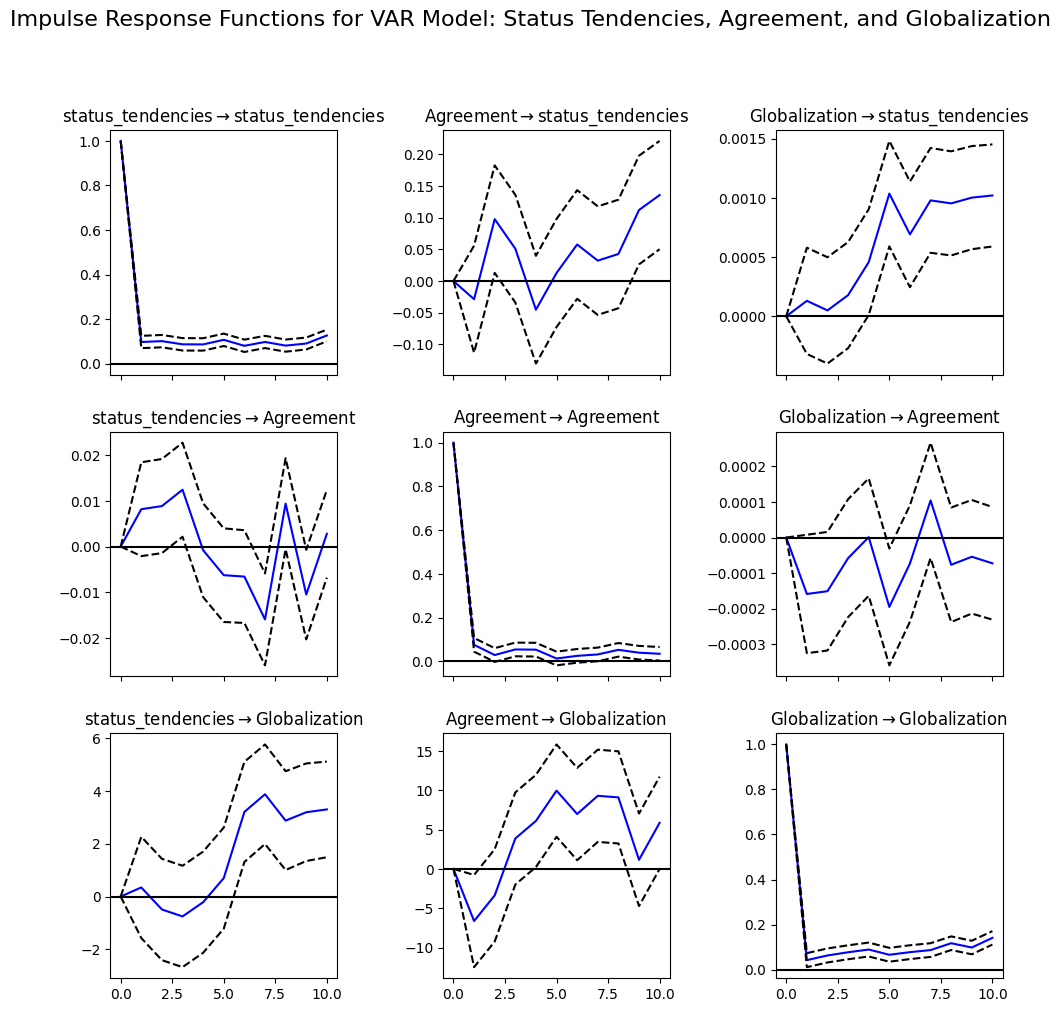

In [43]:

   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# Filter necessary columns for the analysis
data_full = df[['Year', 'status_tendencies', 'Agreement', 'Globalization']].dropna()

# Check for stationarity and difference if necessary
def adf_test(series):
    result = adfuller(series.dropna())
    return result[1]  # Return the p-value

# Apply differencing if not stationary
def difference_if_needed(data, column_name):
    if adf_test(data[column_name]) > 0.05:
        data[column_name] = data[column_name].diff()
    return data

# Apply differencing to necessary columns
data_full = difference_if_needed(data_full, 'status_tendencies')
data_full = difference_if_needed(data_full, 'Agreement')
data_full = difference_if_needed(data_full, 'Globalization')

# Drop NaN values after differencing
data_full = data_full.dropna()

# Fit a VAR model with the selected variables
model_var_full = VAR(data_full[['status_tendencies', 'Agreement', 'Globalization']])
lag_order_full = model_var_full.select_order(maxlags=10)
optimal_lag_full = lag_order_full.aic
model_var_full_fitted = model_var_full.fit(optimal_lag_full)

# Display the summary of the VAR model
var_summary_full = model_var_full_fitted.summary()
print(var_summary_full)

# Perform Granger Causality Test for `status_tendencies` predicting `Agreement`
granger_test_results_tendencies = grangercausalitytests(data_full[['status_tendencies', 'Agreement']], maxlag=optimal_lag_full, verbose=False)

# Perform Granger Causality Test for `Agreement` predicting `Globalization`
granger_test_results_globalization = grangercausalitytests(data_full[['Agreement', 'Globalization']], maxlag=optimal_lag_full, verbose=False)

# Collect p-values from Granger Causality Test results
granger_p_values_tendencies = {key: granger_test_results_tendencies[key][0]['ssr_ftest'][1] for key in granger_test_results_tendencies.keys()}
granger_p_values_globalization = {key: granger_test_results_globalization[key][0]['ssr_ftest'][1] for key in granger_test_results_globalization.keys()}

# Print Granger Causality Test results
print("\nGranger Causality Test for status_tendencies predicting Agreement:")
for key, p_value in granger_p_values_tendencies.items():
    print(f"Lag {key}: p-value = {p_value}")

print("\nGranger Causality Test for Agreement predicting Globalization:")
for key, p_value in granger_p_values_globalization.items():
    print(f"Lag {key}: p-value = {p_value}")

# Plot the Impulse Response Function (IRF) for the VAR model
irf_full = model_var_full_fitted.irf(10)

# Adjust the IRF plot for better readability
fig = irf_full.plot(orth=False)

# Adjust the layout to prevent label overlapping
fig.tight_layout(pad=2.0)  # Increase padding around subplots
plt.subplots_adjust(top=0.9)  # Adjust top spacing
fig.suptitle('Impulse Response Functions for VAR Model: Status Tendencies, Agreement, and Globalization', fontsize=16, y=1.02)  # Move the title upwards

# Save the figure
plt.savefig('impulse_response_functions.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [44]:
import pandas as pd
import statsmodels.api as sm

# Direct effect of nat_res on status_tendencies
X = df[['nat_res']]
X = sm.add_constant(X)
Y = df['status_tendencies']
direct_model = sm.OLS(Y, X).fit()

# Print summary of the direct model
print("Direct Model Summary (nat_res on status_tendencies):\n", direct_model.summary())

Direct Model Summary (nat_res on status_tendencies):
                             OLS Regression Results                            
Dep. Variable:      status_tendencies   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     23.13
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.56e-06
Time:                        12:36:39   Log-Likelihood:                 60.970
No. Observations:                5046   AIC:                            -117.9
Df Residuals:                    5044   BIC:                            -104.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [64]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure 'df' is assigned to the final merged DataFrame
df = df_merged  # Use the merged DataFrame for analysis

# Rename 'Homicide rate per 100,000 population - Both sexes - All ages' to 'Homicides' if 'Homicides' is missing
if 'Homicides' not in df.columns and 'Homicide rate per 100,000 population - Both sexes - All ages' in df.columns:
    df.rename(columns={'Homicide rate per 100,000 population - Both sexes - All ages': 'Homicides'}, inplace=True)
    print("Renamed 'Homicide rate per 100,000 population - Both sexes - All ages' to 'Homicides'.")

# Debug: Check if 'Homicides' is present in df and its data type
print("\nColumns in the DataFrame used for analysis:")
print(df.columns)  # Check the available columns in the DataFrame

if 'Homicides' in df.columns:
    # Check the data type and null values in 'Homicides'
    print(f"\n'Homicides' column data type: {df['Homicides'].dtype}")
    print(f"Number of NaN values in 'Homicides': {df['Homicides'].isna().sum()}")

    # Convert 'Homicides' to numeric if it's not already
    df['Homicides'] = pd.to_numeric(df['Homicides'], errors='coerce')

    # Drop rows with NaN values in 'Homicides' and 'status_tendencies' to avoid errors in regression
    df = df.dropna(subset=['Homicides', 'status_tendencies'])
else:
    print("Error: 'Homicides' column is still missing in the DataFrame used for analysis.")

# Proceed with the analysis if 'Homicides' and 'status_tendencies' are present and properly formatted
if 'Homicides' in df.columns and 'status_tendencies' in df.columns:
    # Define the dependent variable
    dv = 'status_tendencies'

    # Define the list of independent variables
    independent_vars = ['Globalization', 'cinc', 'hdi', 'gini', 'Growth', 'Homicides']

    # Check and convert independent variables to numeric, handling errors
    for var in independent_vars:
        if var in df.columns:
            df[var] = pd.to_numeric(df[var], errors='coerce')
        else:
            print(f"Warning: Independent variable '{var}' is not present in the DataFrame.")

    # Drop rows with NaN values in any of the independent variables
    df = df.dropna(subset=independent_vars + [dv])

    # Define the regression formula with all independent variables
    formula = f"{dv} ~ " + " + ".join(independent_vars)

    # Fit the multiple regression model
    model = ols(formula, data=df).fit()

    # Print the summary of the regression model
    print("\nMultiple Regression of 'status_tendencies' on Independent Variables:")
    print(model.summary())

    # Check for multicollinearity using Variance Inflation Factor (VIF)
    X = df[independent_vars]
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    # Calculate VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]

    print("\nVariance Inflation Factor (VIF) for Independent Variables:")
    print(vif_data)

    # Optionally, perform individual regressions for each independent variable
    print("\nIndividual Regressions Predicting 'status_tendencies':")
    for var in independent_vars:
        if var in df.columns:
            individual_formula = f"{dv} ~ {var}"
            individual_model = ols(individual_formula, data=df).fit()
            print(f"\nRegression of 'status_tendencies' on '{var}':")
            print(individual_model.summary())
        else:
            print(f"Cannot perform regression for '{var}' as it is missing in the DataFrame.")
else:
    print("\nAnalysis cannot proceed as required columns are missing or improperly formatted.")


Columns in the DataFrame used for analysis:
Index(['Analytic', 'cogproc', 'Clout', 'power', 'prosocial', 'emo_anger',
       'conflict', 'allnone', 'family', 'friend', 'tone_pos', 'tone_neg',
       'emo_anx', 'emo_sad', 'swear', 'polite', 'moral', 'reward', 'risk',
       'allure', 'Growth', 'nat_res', 'hdi', 'cinc', 'gini', 'Globalization',
       'Homicides', 'Agreement', 'Year', 'Country', 'Code_x', 'Code_y',
       'Name of Person Speaking', 'Country_y', 'Country_x', 'Country_clean',
       'Name', 'Inferred_Gender', 'BirthDate', 'Sex', 'Age', 'Year_order',
       'prestige', 'dominance', 'normalized_dominance', 'normalized_prestige',
       'relative_prestige', 'status_tendencies'],
      dtype='object')

'Homicides' column data type: float64
Number of NaN values in 'Homicides': 0

Multiple Regression of 'status_tendencies' on Independent Variables:
                            OLS Regression Results                            
Dep. Variable:      status_tendencies   R-squared:  

In [45]:
import pandas as pd
from statsmodels.formula.api import ols

# Ensure 'df' is assigned to the final merged DataFrame
df = df_merged  # Use the merged DataFrame for analysis

# Rename 'Homicide rate per 100,000 population - Both sexes - All ages' to 'Homicides' if 'Homicides' is missing
if 'Homicides' not in df.columns and 'Homicide rate per 100,000 population - Both sexes - All ages' in df.columns:
    df.rename(columns={'Homicide rate per 100,000 population - Both sexes - All ages': 'Homicides'}, inplace=True)
    print("Renamed 'Homicide rate per 100,000 population - Both sexes - All ages' to 'Homicides'.")

# Debug: Check if 'Homicides' is present in df and its data type
print("\nColumns in the DataFrame used for analysis:")
print(df.columns)  # Check the available columns in the DataFrame

if 'Homicides' in df.columns:
    # Check the data type and null values in 'Homicides'
    print(f"\n'Homicides' column data type: {df['Homicides'].dtype}")
    print(f"Number of NaN values in 'Homicides': {df['Homicides'].isna().sum()}")

    # Convert 'Homicides' to numeric if it's not already
    df['Homicides'] = pd.to_numeric(df['Homicides'], errors='coerce')

    # Drop rows with NaN values in 'Homicides' to avoid errors in regression
    df = df.dropna(subset=['Homicides'])
else:
    print("Error: 'Homicides' column is still missing in the DataFrame used for analysis.")

# Proceed with the analysis if 'Homicides' is present and properly formatted
if 'Homicides' in df.columns:
    # Step 1: Regress Mediator (Globalization) on IV (status_tendencies)
    model_m = ols('Globalization ~ status_tendencies', data=df).fit()
    coef_m = model_m.params['status_tendencies']
    pval_m = model_m.pvalues['status_tendencies']

    print("\nRegression of Mediator (Globalization) on IV (status_tendencies):")
    print(model_m.summary())

    # Prepare a dictionary to store the results for each dependent variable
    dependent_vars = ['cinc', 'hdi', 'gini', 'Growth', 'Homicides']
    results_individual = {}

    for dv in dependent_vars:
        # Step 2: Regress each DV on IV and Mediator
        if dv in df.columns:  # Ensure the dependent variable exists in df
            model_y_iv_m = ols(f'{dv} ~ status_tendencies + Globalization', data=df).fit()
            
            # Store the results
            results_individual[dv] = {
                'IV_coefficient': model_y_iv_m.params['status_tendencies'],
                'IV_pvalue': model_y_iv_m.pvalues['status_tendencies'],
                'M_coefficient': model_y_iv_m.params['Globalization'],
                'M_pvalue': model_y_iv_m.pvalues['Globalization'],
                'Indirect_effect': coef_m * model_y_iv_m.params['Globalization'],
                'Indirect_pvalue': max(pval_m, model_y_iv_m.pvalues['Globalization'])  # Conservative approach
            }
        else:
            print(f"Dependent variable '{dv}' is not present in the DataFrame.")

    # Display the results
    for dv, res in results_individual.items():
        print(f"\nResults for {dv}:")
        print(f"Coefficient of status_tendencies on {dv}: {res['IV_coefficient']} (p-value: {res['IV_pvalue']})")
        print(f"Coefficient of Globalization on {dv}: {res['M_coefficient']} (p-value: {res['M_pvalue']})")
        print(f"Indirect effect of status_tendencies on {dv} through Globalization: {res['Indirect_effect']} (p-value: {res['Indirect_pvalue']})")
else:
    print("\nAnalysis cannot proceed as 'Homicides' is missing or improperly formatted.")

Renamed 'Homicide rate per 100,000 population - Both sexes - All ages' to 'Homicides'.

Columns in the DataFrame used for analysis:
Index(['Analytic', 'cogproc', 'Clout', 'power', 'prosocial', 'emo_anger',
       'conflict', 'allnone', 'family', 'friend', 'tone_pos', 'tone_neg',
       'emo_anx', 'emo_sad', 'swear', 'polite', 'moral', 'reward', 'risk',
       'allure', 'Growth', 'nat_res', 'hdi', 'cinc', 'gini', 'Globalization',
       'Homicides', 'Agreement', 'Year', 'Country', 'Code_x', 'Code_y',
       'Name of Person Speaking', 'Country_y', 'Country_x', 'Country_clean',
       'Name', 'Inferred_Gender', 'BirthDate', 'Sex', 'Age', 'Year_order',
       'prestige', 'dominance', 'normalized_dominance', 'normalized_prestige',
       'relative_prestige', 'status_tendencies'],
      dtype='object')

'Homicides' column data type: float64
Number of NaN values in 'Homicides': 0

Regression of Mediator (Globalization) on IV (status_tendencies):
                            OLS Regression Resu

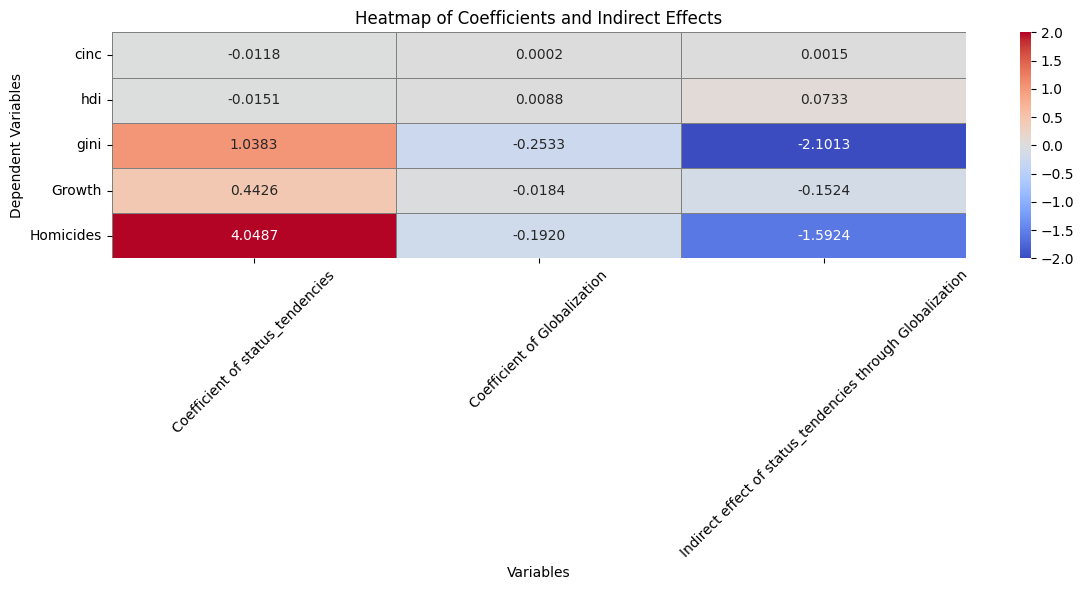

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation
data = {
    'Dependent Variable': ['cinc', 'hdi', 'gini', 'Growth', 'Homicides'],
    'Coefficient of status_tendencies': [-0.0118, -0.0151, 1.0383, 0.4426, 4.0487],
    'Coefficient of Globalization': [0.0002, 0.0088, -0.2533, -0.0184, -0.1920],
    'Indirect effect of status_tendencies through Globalization': [0.0015, 0.0733, -2.1013, -0.1524, -1.5924]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Dependent Variable', inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.4f', vmin=-2, vmax=2, center=0, linewidths=0.5, linecolor='gray')

# Customize the plot
plt.title('Heatmap of Coefficients and Indirect Effects')
plt.xlabel('Variables')
plt.ylabel('Dependent Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Save the figure
plt.tight_layout()
plt.savefig('heatmap_coefficients_indirect_effects.png', dpi=300)  # Save the figure as a PNG file

# Display the plot
plt.show()

In [55]:
# Get total number of unique individuals (assuming "Name of Person Speaking" is the unique identifier)
num_unique_individuals = df_merged['Name of Person Speaking'].nunique()

# Get number of individuals with recorded Sex
num_with_sex = df_merged.dropna(subset=['Sex'])['Name of Person Speaking'].nunique()

# Get number of individuals with recorded Age
num_with_age = df_merged.dropna(subset=['Age'])['Name of Person Speaking'].nunique()

# Get number of individuals with both Sex and Age recorded
num_with_both = df_merged.dropna(subset=['Sex', 'Age'])['Name of Person Speaking'].nunique()

# Get number of males and females for each category
num_males_total = df_merged[df_merged['Sex'] == 'male']['Name of Person Speaking'].nunique()
num_females_total = df_merged[df_merged['Sex'] == 'female']['Name of Person Speaking'].nunique()

num_males_with_age = df_merged.dropna(subset=['Age']).query("Sex == 'male'")['Name of Person Speaking'].nunique()
num_females_with_age = df_merged.dropna(subset=['Age']).query("Sex == 'female'")['Name of Person Speaking'].nunique()

num_males_with_both = df_merged.dropna(subset=['Sex', 'Age']).query("Sex == 'male'")['Name of Person Speaking'].nunique()
num_females_with_both = df_merged.dropna(subset=['Sex', 'Age']).query("Sex == 'female'")['Name of Person Speaking'].nunique()

# Print results
print(f"Total number of unique individuals: {num_unique_individuals}")
print(f"Number of individuals with recorded Sex: {num_with_sex}")
print(f"Number of individuals with recorded Age: {num_with_age}")
print(f"Number of individuals with both Sex and Age recorded: {num_with_both}\n")

print(f"Number of males (total): {num_males_total}")
print(f"Number of females (total): {num_females_total}\n")

print(f"Number of males with recorded Age: {num_males_with_age}")
print(f"Number of females with recorded Age: {num_females_with_age}\n")

print(f"Number of males with both Sex and Age recorded: {num_males_with_both}")
print(f"Number of females with both Sex and Age recorded: {num_females_with_both}")

Total number of unique individuals: 4590
Number of individuals with recorded Sex: 3119
Number of individuals with recorded Age: 730
Number of individuals with both Sex and Age recorded: 665

Number of males (total): 2926
Number of females (total): 193

Number of males with recorded Age: 635
Number of females with recorded Age: 30

Number of males with both Sex and Age recorded: 635
Number of females with both Sex and Age recorded: 30


=== Weighted Polynomial Regression Results ===
                            WLS Regression Results                            
Dep. Variable:      status_tendencies   R-squared:                       0.228
Model:                            WLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     52.53
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           8.10e-57
Time:                        13:27:01   Log-Likelihood:                -100.93
No. Observations:                1075   AIC:                             215.9
Df Residuals:                    1068   BIC:                             250.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

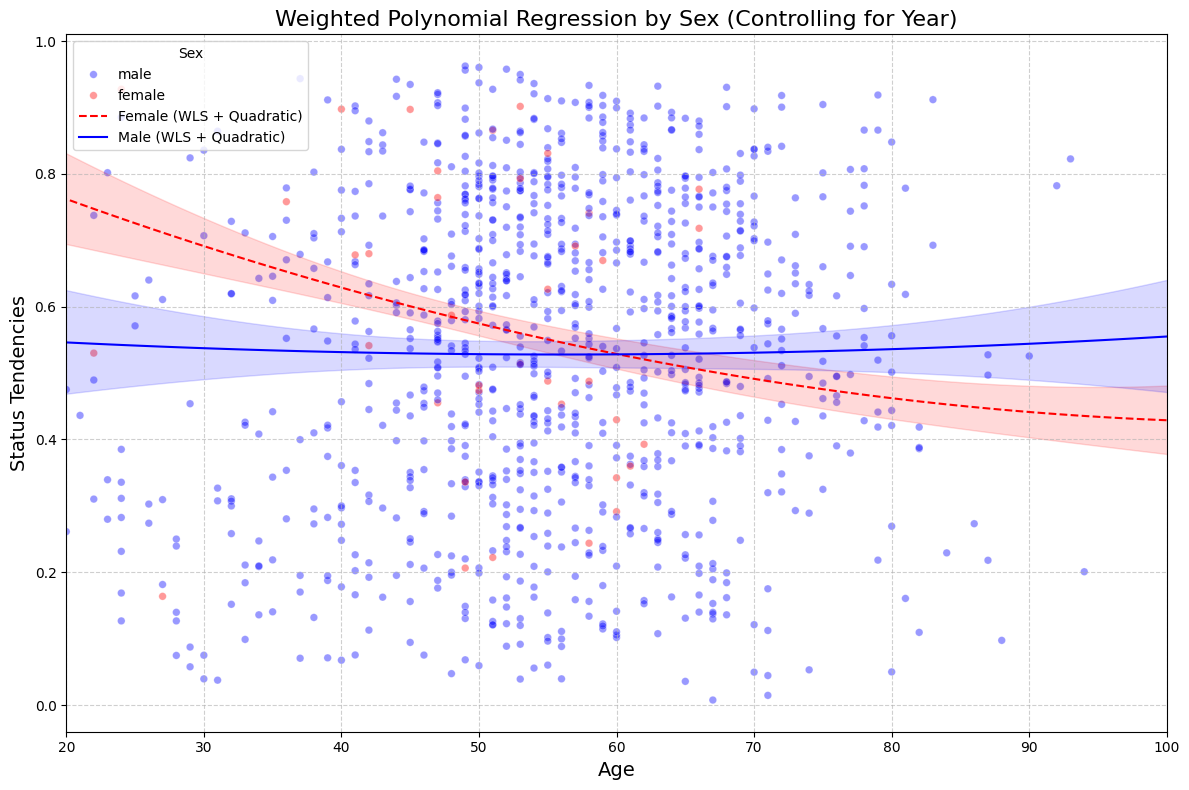

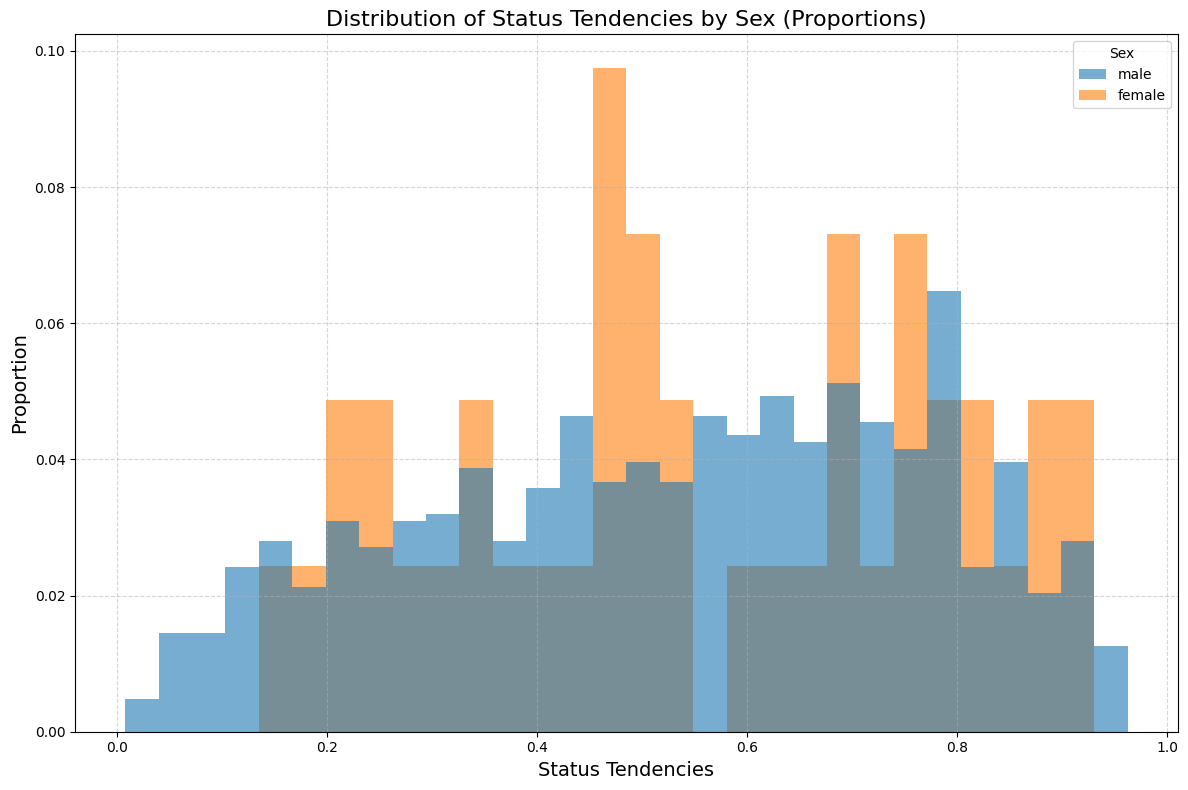

In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------
# 1. Data Preparation (for Weighted Polynomial Regression)
# --------------------------------------------------------------------------------------

# Assuming df_merged is your DataFrame
# Select relevant columns and drop rows with missing values
df_filtered = df_merged[['Sex', 'Age', 'Year', 'status_tendencies']].dropna().copy()

# Encode Sex numerically: male=1, female=0
df_filtered['Sex_Encoded'] = df_filtered['Sex'].map({'male': 1, 'female': 0})

# Center Year to reduce multicollinearity with Age
df_filtered['Year_Centered'] = df_filtered['Year'] - df_filtered['Year'].mean()

# Create a quadratic term for Age
df_filtered['Age2'] = df_filtered['Age']**2

# --------------------------------------------------------------------------------------
# 2. Addressing Imbalance with Weighted Least Squares (WLS)
# --------------------------------------------------------------------------------------

# Count number of males and females
n_male = (df_filtered['Sex_Encoded'] == 1).sum()
n_female = (df_filtered['Sex_Encoded'] == 0).sum()

# Calculate weight factor to balance female observations
weight_factor = n_male / n_female if n_female > 0 else 1

# Assign weights: females get up-weighted, males have weight=1
df_filtered['weights'] = df_filtered['Sex_Encoded'].apply(lambda x: weight_factor if x == 0 else 1.0)

# --------------------------------------------------------------------------------------
# 3. Weighted Polynomial Regression
# --------------------------------------------------------------------------------------

# Define the regression formula with polynomial and interaction terms
formula = (
    "status_tendencies ~ "
    "Age + I(Age**2) + "
    "Sex_Encoded + "
    "Age:Sex_Encoded + I(Age**2):Sex_Encoded + "
    "Year_Centered"
)

# Fit the Weighted Least Squares (WLS) model
model = sm.WLS.from_formula(formula, data=df_filtered, weights=df_filtered['weights']).fit()

# Display the regression results
print("=== Weighted Polynomial Regression Results ===")
print(model.summary())

# --------------------------------------------------------------------------------------
# 4. Generating Predictions for Visualization
# --------------------------------------------------------------------------------------

# Create a grid of Age values for prediction (20 to 100)
age_grid = np.linspace(df_filtered['Age'].min(), df_filtered['Age'].max(), 100)

# Create a DataFrame for prediction: all combinations of Age and Sex at mean Year
df_pred = pd.DataFrame({
    'Age': np.tile(age_grid, 2),
    'Age2': np.tile(age_grid**2, 2),
    'Sex_Encoded': np.repeat([0, 1], len(age_grid)),  # 0=female, 1=male
    'Year_Centered': 0.0  # Fix Year at mean for predictions
})

# Get prediction results with confidence intervals
predictions = model.get_prediction(df_pred)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Add predictions and confidence intervals to the prediction DataFrame
df_pred['Predicted'] = pred_summary['mean']
df_pred['CI_low'] = pred_summary['mean_ci_lower']
df_pred['CI_high'] = pred_summary['mean_ci_upper']

# Separate predictions by Sex for plotting
df_pred_female = df_pred[df_pred['Sex_Encoded'] == 0]
df_pred_male = df_pred[df_pred['Sex_Encoded'] == 1]

# --------------------------------------------------------------------------------------
# 5. Visualization: Regression Curves with Confidence Intervals
# --------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))

# Scatter plot of raw data
sns.scatterplot(
    data=df_filtered,
    x='Age',
    y='status_tendencies',
    hue='Sex',
    palette={'male': 'blue', 'female': 'red'},
    alpha=0.4,
    s=30
)

# Plot predicted regression lines
plt.plot(df_pred_female['Age'], df_pred_female['Predicted'], color='red', linestyle='--', label='Female (WLS + Quadratic)')
plt.plot(df_pred_male['Age'], df_pred_male['Predicted'], color='blue', linestyle='-', label='Male (WLS + Quadratic)')

# Plot confidence intervals as shaded areas
plt.fill_between(
    df_pred_female['Age'],
    df_pred_female['CI_low'],
    df_pred_female['CI_high'],
    color='red',
    alpha=0.15
)
plt.fill_between(
    df_pred_male['Age'],
    df_pred_male['CI_low'],
    df_pred_male['CI_high'],
    color='blue',
    alpha=0.15
)

# Customize plot
plt.title('Weighted Polynomial Regression by Sex (Controlling for Year)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Status Tendencies', fontsize=14)
plt.legend(title='Sex', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(20, 100)
plt.tight_layout()

# Save and show the regression plot
plt.savefig('weighted_polynomial_regression_with_CI.png', dpi=300, bbox_inches='tight')
plt.show()

# --------------------------------------------------------------------------------------
# 6. Visualization: Distribution of Status Tendencies by Sex (Proportions)
# --------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))

# Histogram with proportions for each Sex
sns.histplot(
    data=df_filtered,
    x='status_tendencies',
    hue='Sex',
    stat='probability',   # y-axis = proportion
    common_norm=False,    # each Sex is scaled independently
    bins=30,
    alpha=0.6,
    edgecolor=None
)

# Customize plot
plt.title('Distribution of Status Tendencies by Sex (Proportions)', fontsize=16)
plt.xlabel('Status Tendencies', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
# Seaborn automatically handles the legend based on hue
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save and show the distribution plot
plt.savefig('status_tendencies_distribution_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()

Identified Cycle Length: 23.00 years
R-squared: 0.95
Mean Squared Error: 0.00075


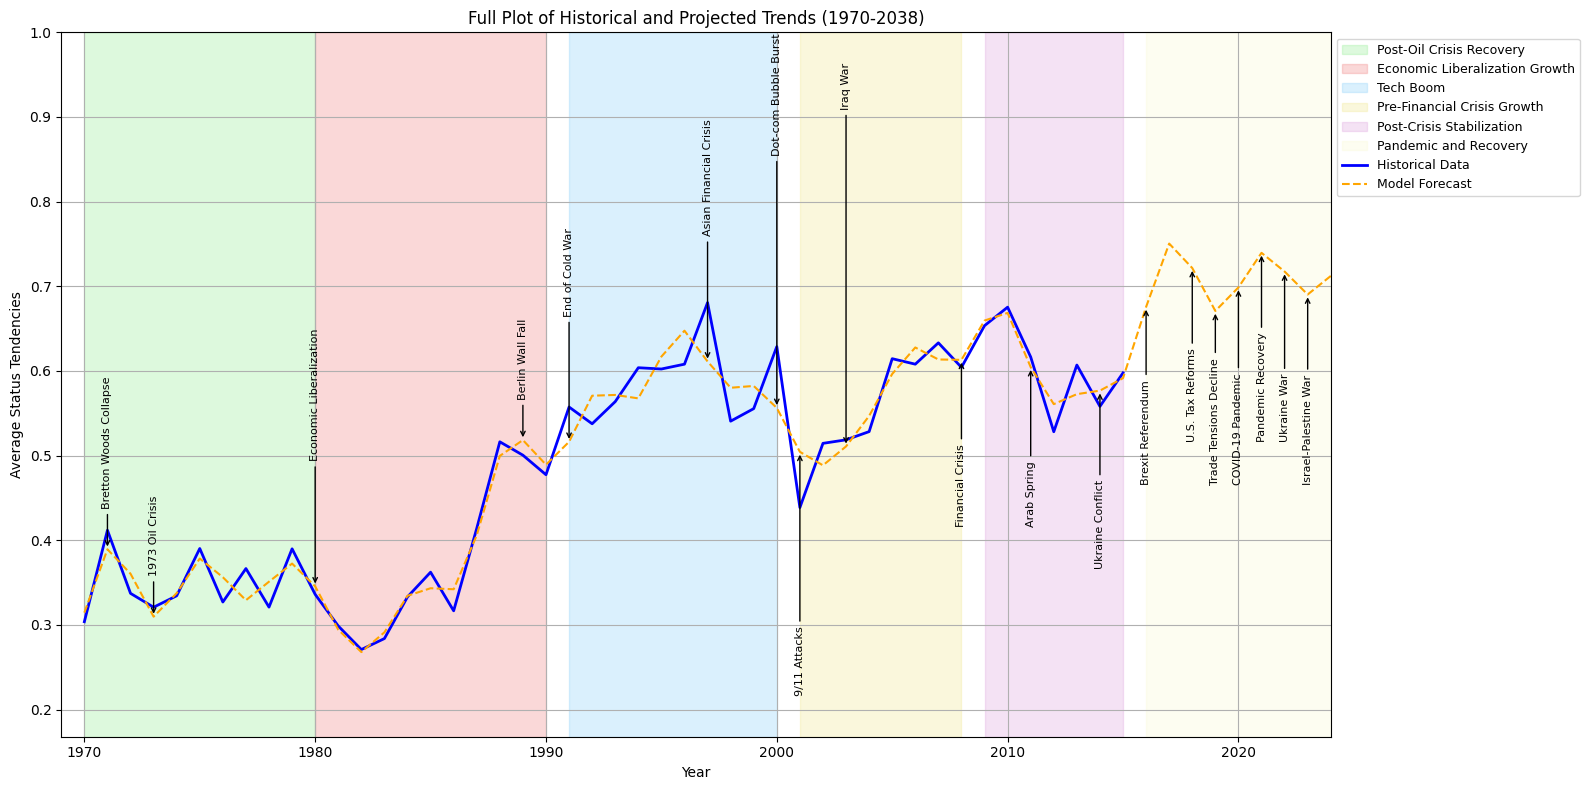

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from sklearn.metrics import r2_score, mean_squared_error

# Define the data
data = {
    'Year': list(range(1970, 2016)),
    'Average Status Tendencies': [
        0.303722, 0.411761, 0.337218, 0.320845, 0.334360, 0.390215, 0.326997,
        0.366526, 0.320957, 0.389850, 0.336023, 0.298688, 0.270853, 0.283836,
        0.333074, 0.362237, 0.316595, 0.413985, 0.516259, 0.500455, 0.477378,
        0.557367, 0.537560, 0.563730, 0.603783, 0.602266, 0.607977, 0.680690,
        0.540643, 0.555463, 0.628694, 0.438595, 0.514446, 0.518605, 0.528311,
        0.614458, 0.607973, 0.633184, 0.604222, 0.653467, 0.675309, 0.616466,
        0.528160, 0.606948, 0.558125, 0.597648
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Function to identify cycle length using FFT
def identify_cycle_length(data):
    detrended_data = data - np.polyval(np.polyfit(np.arange(len(data)), data, 1), np.arange(len(data)))
    fft_values = fft(detrended_data)
    power_spectrum = np.abs(fft_values) ** 2
    frequencies = np.fft.fftfreq(len(fft_values))
    peak_frequency = frequencies[np.argmax(power_spectrum[1:]) + 1]
    return abs(1 / peak_frequency)

cycle_length = identify_cycle_length(df['Average Status Tendencies'].values)
print(f"Identified Cycle Length: {cycle_length:.2f} years")

# Function to perform FFT + Linear Projection
def fft_linear_projection(data, cycle_length, freq_cutoff=0.3):
    x = np.arange(len(data))
    coefficients = np.polyfit(x, data, 1)
    trend = np.polyval(coefficients, x)
    detrended_data = data - trend

    fft_values = fft(detrended_data)
    frequencies = np.fft.fftfreq(len(fft_values))
    fft_values[np.abs(frequencies) > freq_cutoff] = 0
    refined_cycle = ifft(fft_values).real
    combined_signal = refined_cycle + trend

    future_years = np.arange(len(data), len(data) + cycle_length)
    future_trend = np.polyval(coefficients, future_years)
    cycle_pattern_length = len(refined_cycle)
    future_cycle_pattern = np.tile(refined_cycle, int(np.ceil(cycle_length / cycle_pattern_length)))[:cycle_length]
    future_signal = future_trend + future_cycle_pattern

    return np.concatenate([combined_signal, future_signal])

# Perform FFT + Linear Trend Projection for the full period
full_cycle_length = 69  # Full cycle length from 1970 to 2038
forecast_full = fft_linear_projection(df['Average Status Tendencies'].values, cycle_length=full_cycle_length)

# Goodness of fit for historical data
r_squared = r2_score(df['Average Status Tendencies'].values, forecast_full[:len(df)])
mse = mean_squared_error(df['Average Status Tendencies'].values, forecast_full[:len(df)])
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error: {mse:.5f}")

# Full years for plotting from 1970 to 2038
full_years = list(range(1970, 2039))

# Define significant events
significant_events = {
    1971: "Bretton Woods Collapse", 1973: "1973 Oil Crisis", 1980: "Economic Liberalization",
    1989: "Berlin Wall Fall", 1991: "End of Cold War", 1997: "Asian Financial Crisis",
    2000: "Dot-com Bubble Burst", 2001: "9/11 Attacks", 2003: "Iraq War",
    2008: "Financial Crisis", 2011: "Arab Spring", 2014: "Ukraine Conflict",
    2016: "Brexit Referendum", 2018: "U.S. Tax Reforms", 2019: "Trade Tensions Decline",
    2020: "COVID-19 Pandemic", 2021: "Pandemic Recovery", 2022: "Ukraine War",
    2023: "Israel-Palestine War"
}

# Annotate trends and periods with colors and descriptions
trends_and_periods = {
    (1970, 1980): ("Post-Oil Crisis Recovery", 'lightgreen'),
    (1980, 1990): ("Economic Liberalization Growth", 'lightcoral'),
    (1991, 2000): ("Tech Boom", 'lightskyblue'),
    (2001, 2008): ("Pre-Financial Crisis Growth", 'khaki'),
    (2009, 2015): ("Post-Crisis Stabilization", 'plum'),
    (2016, 2024): ("Pandemic and Recovery", 'lightgoldenrodyellow')
}

# Plot the full dataset and forecast
plt.figure(figsize=(16, 8))

# Add colored bands for trends and periods
for (start, end), (description, color) in trends_and_periods.items():
    plt.axvspan(start, end, color=color, alpha=0.3, label=description)

# Plot historical data
plt.plot(df.index, df['Average Status Tendencies'], label='Historical Data', color='blue', linewidth=2)

# Plot forecast
plt.plot(full_years, forecast_full[:len(full_years)], label='Model Forecast', color='orange', linestyle='--')

# Annotate significant events
used_positions = []  # Track used y-positions to avoid overlaps
y_min = min(forecast_full) - 0.1  # Lower boundary of the y-axis
y_max = 1  # Upper boundary of the y-axis
annotation_margin = 0.05  # Minimum spacing for annotations
max_attempts = 10  # Safeguard to prevent infinite loops

for year, event in significant_events.items():
    y_value = forecast_full[year - 1970]
    ypos = y_value + annotation_margin  # Start slightly above the data point
    attempts = 0  # Counter to limit adjustment attempts

    # Ensure ypos stays within plot bounds
    ypos = min(ypos, y_max - annotation_margin)  # Limit to upper y-axis
    ypos = max(ypos, y_min + annotation_margin)  # Limit to lower y-axis

    # Adjust position to avoid overlaps with previous annotations
    while any(abs(ypos - used_y) < annotation_margin for used_y in used_positions):
        ypos += annotation_margin  # Move the annotation upward
        attempts += 1  # Increment the attempt counter
        if ypos > y_max - annotation_margin:  # If it exceeds the top, wrap around
            ypos = y_min + annotation_margin
        if attempts >= max_attempts:  # Break if adjustment attempts exceed limit
            break

    # Store the used position
    used_positions.append(ypos)

    # Annotate the event
    plt.annotate(event, xy=(year, y_value), xytext=(year, ypos),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
                 fontsize=8, ha='center', rotation=90)

plt.xlabel('Year')
plt.ylabel('Average Status Tendencies')
plt.title('Full Plot of Historical and Projected Trends (1970-2038)')
plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xlim(1969, 2024)  # Limit x-axis to 2024
plt.ylim(y_min, y_max)  # Set y-axis limits
plt.tight_layout()

# Save the figure
plt.savefig('historical_and_projected_trends.png')

# Show the figure
plt.show()

# Close the plot
plt.close()